<a href="https://colab.research.google.com/github/Minh-A/Dacon_ArcticSeaIce_Prediction/blob/main/Dacon_Code_9_SemiFinal%20Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리

In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

from tqdm import tqdm  # 진행표시바

from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


그냥 같은지 확인

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub_0408_1_KNN(12, 601).csv').iloc[:,1:]
b = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub_0412_1_KNN(12, 601).csv').iloc[:,1:]
c = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub_0412_2_KNN(12, 601).csv').iloc[:,1:]
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub_0408_3_KNN(12, 591).csv').iloc[:,1:]

In [ ]:
sum(mae_score(b,d))

963.9254166666691

In [ ]:
print( "MAE : %s" % mae_score( a,b ),
       '\n F1 : %s' % f1_score( a,b ),
       '\n Final %s' % mae_over_f1( a,b ))

TypeError: ignored

In [ ]:
# 2차 데이터
fn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data2/train_v2.csv')
fn.tail()

,month,file_nm
489,2019-08,201908.npy
490,2019-09,201909.npy
491,2019-10,201910.npy
492,2019-11,201911.npy
493,2019-12,201912.npy


In [ ]:
# 데이터 불러오기
# 2000년도부터
dm = fn.iloc[255:,1]
dm.shape

(239,)

In [ ]:
# 데이터 생성
data = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data2/train_data_v2/200001.npy')
data = data.reshape(1,448,304,5)

for i in tqdm(dm):
    a = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data2/train_data_v2/'+i)
    a = a.reshape(1,448,304,5)

    data = np.concatenate((data,a), axis=0)
data = np.array(data)
data = data[:,:,:,0]

data.shape

100%|██████████| 239/239 [01:51<00:00,  2.14it/s]


(240, 448, 304)

In [ ]:
# 월별 데이터 셋 만들기

# 데이터 셋 형태 변환
data = data.reshape(240,1, 448,304)

# 월별로 데이터 셋 생성
for i in tqdm(range(12)):
  globals()['train{}'.format(i)] = np.array(np.concatenate((data[0+i], data[12+i], data[24+i], data[36+i], data[48+i], data[60+i], data[72+i], data[84+i], data[96+i], data[108+i], data[120+i],
                                                            data[132+i], data[144+i], data[156+i], data[168+i], data[180+i], data[192+i], data[204+i], data[216+i], data[228+i]), axis=0))

  print("\n",globals()['train{}'.format(i)].shape)  # globals()는 그 변수를 의미 - 없으면 그냥 문자열

100%|██████████| 12/12 [00:00<00:00, 258.91it/s]


 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)


## 함수

In [ ]:
def show(npy):
    num_channel = npy.shape[0]
    plt.figure(figsize=(50, 50)) 
    for channel in range(num_channel):
      tmpimg = npy[channel, :, :]
      ax = plt.subplot(1, num_channel, channel+1)  # (행, 열, 데이터 개수) - 그리고 싶은 팜플렛
      ax.title.set_text("Ice")

      ax.imshow(tmpimg)
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
# 소숫점 둘째 자리 반올림
def fun1(x) : 
  return np.around(x,2)

In [ ]:
# 점수 계산
def mae_score(true, pred):
    score = np.mean(np.abs(true-pred))
    
    return score

def f1_score(true, pred):
    target = np.where((true>250*0.05)&(true<250*0.5))
    
    true = true[target]
    pred = pred[target]
    true = np.where(true < 250*0.15, 0, 1)
    pred = np.where(pred < 250*0.15, 0, 1)
    
    right = np.sum(true * pred == 1)
    precision = right / np.sum(true+1e-8)
    recall = right / np.sum(pred+1e-8)
    score = 2 * precision*recall/(precision+recall+1e-8)
    
    return score
    
def mae_over_f1(true, pred):
    mae = mae_score(true, pred)
    f1 = f1_score(true, pred)
    score = mae/(f1+1e-8)
    
    return score

# 테스팅

In [ ]:
# 600, 650, 700을 찾아서

for j in tqdm(range(12)):
  print(j)
  dataset = globals()['train{}'.format(j)]

  # 훈련데이터 12개만
  x_train = dataset[6:18].reshape( 12,-1).T
  y_train = dataset[18].reshape(1,-1).T  # 변동없음
  x_test = dataset[7:19].reshape( 12,-1).T
  real = dataset[19]  # 변동없음

  # K값을 찾아 1
  from sklearn.neighbors import KNeighborsRegressor

  num = [500, 550, 600, 601, 650, 700, 750, 800, 850, 900, 950]

  for i in num:
    print(i)
    model = KNeighborsRegressor(n_neighbors= i, weights='distance', p=1, n_jobs=-1)
    model.fit(x_train, y_train)

    pre = model.predict(x_test)
    pre = pre.reshape(-1)
  
    print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
           '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
           '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/12 [00:00<?, ?it/s]

0
500
MAE : 1.879193711818609 
 F1 : 0.8510191017234283 
 Final 2.2081686367924083
550
MAE : 1.8646010044642858 
 F1 : 0.8533053315587829 
 Final 2.1851509813100547
600
MAE : 1.8508407248590226 
 F1 : 0.8547474124343063 
 Final 2.1653656697645944
601
MAE : 1.8504875469924813 
 F1 : 0.8549874066845191 
 Final 2.1643447738310875
650
MAE : 1.838792733787594 
 F1 : 0.854140375125327 
 Final 2.1527991953193855
700
MAE : 1.8272760514567667 
 F1 : 0.8544956632693841 
 Final 2.1384263356951
750
MAE : 1.8174374412593983 
 F1 : 0.8526738332527227 
 Final 2.1314567763992387
800
MAE : 1.8085444078947366 
 F1 : 0.8508474375705153 
 Final 2.1255801061151454
850
MAE : 1.8006691288768792 
 F1 : 0.8501165794807638 
 Final 2.1181437359982542
900
MAE : 1.7933976298167293 
 F1 : 0.8482142656553895 
 Final 2.1143214412785323
950


  8%|▊         | 1/12 [1:05:22<11:59:05, 3922.32s/it]

MAE : 1.786857377819549 
 F1 : 0.8481362951438401 
 Final 2.1068044923704874
1
500
MAE : 2.9068139832001885 
 F1 : 0.7494524560476388 
 Final 3.87858351915199
550
MAE : 2.898486768679511 
 F1 : 0.7474747287135975 
 Final 3.8777053170623534
600
MAE : 2.8918575246710523 
 F1 : 0.7445963641246098 
 Final 3.883792112298271
601
MAE : 2.8917368861607144 
 F1 : 0.7445963641246098 
 Final 3.883630093633488
650
MAE : 2.88666368068609 
 F1 : 0.7431476381812262 
 Final 3.8843743739899983
700
MAE : 2.8830461407424814 
 F1 : 0.7420854361898911 
 Final 3.8850595380154416
750
MAE : 2.8800980968045113 
 F1 : 0.7390628282527095 
 Final 3.896959700495335
800
MAE : 2.8782762570488725 
 F1 : 0.7372408994622339 
 Final 3.9041190201292206
850
MAE : 2.8770624559445483 
 F1 : 0.7362784283809285 
 Final 3.9075739638270406
900
MAE : 2.876420347744361 
 F1 : 0.7338258151591268 
 Final 3.9197589525015992
950


 17%|█▋        | 2/12 [2:10:17<10:52:20, 3914.05s/it]

MAE : 2.875877070606203 
 F1 : 0.7312696089267523 
 Final 3.932717832346137
2
500
MAE : 4.186001380404136 
 F1 : 0.754346473626989 
 Final 5.549175970539871
550
MAE : 4.179774656367481 
 F1 : 0.7533319478623943 
 Final 5.548383568151997
600
MAE : 4.174298270089286 
 F1 : 0.7515923381835166 
 Final 5.553939286606529
601
MAE : 4.174209351503761 
 F1 : 0.7510791181904586 
 Final 5.557615961929999
650
MAE : 4.169387922932331 
 F1 : 0.7481420128787358 
 Final 5.572989880837284
700
MAE : 4.164271469689849 
 F1 : 0.7463737900232622 
 Final 5.579337685165344
750
MAE : 4.160175560972745 
 F1 : 0.7434511249500125 
 Final 5.595761934309863
800
MAE : 4.155705327772556 
 F1 : 0.738821544414613 
 Final 5.624775431822947
850
MAE : 4.151248384633459 
 F1 : 0.737018406991323 
 Final 5.632489350238763
900
MAE : 4.147874104205827 
 F1 : 0.7350714701619108 
 Final 5.642817353343914
950


 25%|██▌       | 3/12 [3:15:16<9:46:25, 3909.54s/it] 

MAE : 4.144565906954887 
 F1 : 0.7314502345037391 
 Final 5.666230803937752
3
500
MAE : 2.8488362018327074 
 F1 : 0.7602338987219138 
 Final 3.747315358008825
550
MAE : 2.8562502202772557 
 F1 : 0.7605236462649564 
 Final 3.755636260290338
600
MAE : 2.8642340225563916 
 F1 : 0.7608695458249622 
 Final 3.764421904686258
601
MAE : 2.864374779722745 
 F1 : 0.7608695458249622 
 Final 3.764606899821463
650
MAE : 2.871776095512218 
 F1 : 0.7599677615289743 
 Final 3.7788130011546537
700
MAE : 2.880160288416353 
 F1 : 0.758162012080222 
 Final 3.7988717510722263
750


In [ ]:
# 훈련데이터 12개만
x_train = train1[6:18].reshape( 12,-1).T
y_train = train1[18].reshape(1,-1).T  # 변동없음
x_test = train1[7:19].reshape( 12,-1).T
real = train1[19]  # 변동없음

# K값을 찾아 1
from sklearn.neighbors import KNeighborsRegressor

num = [580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593]

for i in tqdm(num):
  print(i)
  model = KNeighborsRegressor(n_neighbors= i, weights='distance', p=1, n_jobs=-1)
  model.fit(x_train, y_train)

  pre = model.predict(x_test)
  pre = pre.reshape(-1)
  
  print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/14 [00:00<?, ?it/s]

580


  7%|▋         | 1/14 [05:38<1:13:16, 338.21s/it]

MAE : 2.894177411301692 
 F1 : 0.7463672203295241 
 Final 3.8776855329298163
581


 14%|█▍        | 2/14 [11:18<1:07:44, 338.72s/it]

MAE : 2.8941291705827066 
 F1 : 0.7462029308262862 
 Final 3.878474624313295
582


 21%|██▏       | 3/14 [16:55<1:02:00, 338.26s/it]

MAE : 2.893910655545113 
 F1 : 0.7456507189614915 
 Final 3.8810538810518165
583


 29%|██▊       | 4/14 [22:32<56:18, 337.84s/it]  

MAE : 2.8937045494595877 
 F1 : 0.7459268856833926 
 Final 3.879340678295927
584


 36%|███▌      | 5/14 [28:13<50:49, 338.87s/it]

MAE : 2.8937685032894738 
 F1 : 0.7456507189614915 
 Final 3.8808632391733635
585


 43%|████▎     | 6/14 [33:54<45:16, 339.61s/it]

MAE : 2.8936091694078954 
 F1 : 0.7457626931061149 
 Final 3.88006688636474
586


 50%|█████     | 7/14 [39:34<39:36, 339.52s/it]

MAE : 2.893527519971805 
 F1 : 0.7456507189614915 
 Final 3.8805400539228048
587


 57%|█████▋    | 8/14 [45:14<33:58, 339.81s/it]

MAE : 2.893447999882518 
 F1 : 0.7456507189614915 
 Final 3.8804334086984413
588


 64%|██████▍   | 9/14 [50:56<28:21, 340.34s/it]

MAE : 2.893359815554511 
 F1 : 0.7456507189614915 
 Final 3.88031514377281
589


 71%|███████▏  | 10/14 [56:34<22:39, 339.77s/it]

MAE : 2.893104807918233 
 F1 : 0.7453744305802446 
 Final 3.8814113422859857
590


 79%|███████▊  | 11/14 [1:02:11<16:56, 338.80s/it]

MAE : 2.892948411066729 
 F1 : 0.7456507189614915 
 Final 3.879763404906606
591


 86%|████████▌ | 12/14 [1:07:47<11:16, 338.01s/it]

MAE : 2.8928487723214285 
 F1 : 0.7460911505762727 
 Final 3.8773395600706797
592


 93%|█████████▎| 13/14 [1:13:23<05:37, 337.49s/it]

MAE : 2.892685840578008 
 F1 : 0.7450980204592422 
 Final 3.882288936926993
593


100%|██████████| 14/14 [1:19:02<00:00, 338.73s/it]

MAE : 2.892666529605263 
 F1 : 0.7453744305802446 
 Final 3.880823344778815


In [ ]:
# 훈련데이터 12개만
x_train = train1[6:18].reshape( 12,-1).T
y_train = train1[18].reshape(1,-1).T  # 변동없음
x_test = train1[7:19].reshape( 12,-1).T
real = train1[19]  # 변동없음

# K값을 찾아 1
from sklearn.neighbors import KNeighborsRegressor

num = [594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605]

for i in tqdm(num):
  print(i)
  model = KNeighborsRegressor(n_neighbors= i, weights='distance', p=1, n_jobs=-1)
  model.fit(x_train, y_train)

  pre = model.predict(x_test)
  pre = pre.reshape(-1)
  
  print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/12 [00:00<?, ?it/s]

594


  8%|▊         | 1/12 [05:39<1:02:19, 339.97s/it]

MAE : 2.8925676985432327 
 F1 : 0.744708975951903 
 Final 3.8841584472703663
595


 17%|█▋        | 2/12 [11:20<56:40, 340.02s/it]  

MAE : 2.8924406719924813 
 F1 : 0.7443194164948677 
 Final 3.886020664022566
596


 25%|██▌       | 3/12 [16:57<50:53, 339.32s/it]

MAE : 2.8922762717340227 
 F1 : 0.744708975951903 
 Final 3.8837671174828823
597


 33%|███▎      | 4/12 [22:37<45:14, 339.37s/it]

MAE : 2.89210350093985 
 F1 : 0.744432175291746 
 Final 3.884979126482049
598


 42%|████▏     | 5/12 [28:15<39:33, 339.14s/it]

MAE : 2.8919907924107138 
 F1 : 0.7448731896164806 
 Final 3.8825276488665965
599


 50%|█████     | 6/12 [33:56<33:57, 339.57s/it]

MAE : 2.8919396146616534 
 F1 : 0.7448731896164806 
 Final 3.8824589422074136
600


 58%|█████▊    | 7/12 [39:40<28:24, 340.86s/it]

MAE : 2.8918575246710523 
 F1 : 0.7445963641246098 
 Final 3.883792112298271
601


 67%|██████▋   | 8/12 [45:21<22:44, 341.01s/it]

MAE : 2.8917368861607144 
 F1 : 0.7445963641246098 
 Final 3.883630093633488
602


 75%|███████▌  | 9/12 [51:00<17:00, 340.33s/it]

MAE : 2.8915435561560154 
 F1 : 0.7445963641246098 
 Final 3.883370449601611
603


 83%|████████▎ | 10/12 [56:41<11:21, 340.56s/it]

MAE : 2.8914550781250004 
 F1 : 0.7437651544982968 
 Final 3.887591428237187
604


 92%|█████████▏| 11/12 [1:02:20<05:40, 340.16s/it]

MAE : 2.891491203594925 
 F1 : 0.7443194164948677 
 Final 3.8847450444918126
605


100%|██████████| 12/12 [1:08:02<00:00, 340.17s/it]

MAE : 2.8913552925281953 
 F1 : 0.7445963641246098 
 Final 3.8831176097619844


580일때 train1에서

600일때 4.317515622617064 - 2018년

600일때 5.005742495791236 - 2019년 (10)

900일때 4.9909113043175575 단, F1은 0.0805 - 2019년 (10)

900일때 2.1143214412785323 단, F1은 0.08482 - 2019년 (10)

500일때 5.549175970539871 - 2019년 (2)

400일때 3.9107814685121696 - 2019년 (4)

800일때 4.005349103136658 - 2019년 (6)

700일때 2.1384263356951 - 2019년 (0)

In [ ]:
# 두달을 합쳐서...1

a = train0[5:17].reshape( 12,-1).T
b = train1[5:17].reshape( 12,-1).T

x_train = np.array(np.concatenate((a, b), axis=0))

a1 = train0[17].reshape( 1,-1).T
b1 = train1[17].reshape( 1,-1).T

y_train = np.array(np.concatenate((a1, b1), axis=0))

a2 = train0[6:18].reshape( 12,-1).T
b2 = train1[6:18].reshape( 12,-1).T

x_test = np.array(np.concatenate((a2, b2), axis=0))

a3 = train0[18].reshape( 1,-1).T
b3 = train1[18].reshape( 1,-1).T

real = np.array(np.concatenate((a3, b3), axis=0))

In [ ]:
# 두달을 합쳐서...2

model = KNeighborsRegressor(n_neighbors= 600, weights='distance', p=1, n_jobs=-1)
model.fit(x_train, y_train)

pre = model.predict(x_test)
pre = pre.reshape(-1)
  
print("MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

MAE : 3.20470604000235 
 F1 : 0.7732395639215335 
 Final 4.144518915075027


In [ ]:
# 두달을 합쳐서...3

model = KNeighborsRegressor(n_neighbors= 450, weights='distance', p=1, n_jobs=-1)
model.fit(x_train, y_train)

pre = model.predict(x_test)
pre = pre.reshape(-1)
  
print("MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

MAE : 3.2161620726621236 
 F1 : 0.7771839487904788 
 Final 4.138224980437571


In [ ]:
# 두달을 합쳐서...4
# K값을 찾아서
from sklearn.neighbors import KNeighborsRegressor

k_value = [300, 400, 500, 700, 800]

for i in tqdm(k_value):
  print('\n',i)
  model = KNeighborsRegressor(n_neighbors= i, weights='distance', p=1, n_jobs=-1)
  model.fit(x_train, y_train)

  pre = model.predict(x_test)
  pre = pre.reshape(-1)
  
  print("MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
        '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
        '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/5 [00:00<?, ?it/s]


 300


 20%|██        | 1/5 [26:52<1:47:28, 1612.14s/it]

MAE : 3.2450251850328944 
 F1 : 0.7795880542254585 
 Final 4.162487003000633

 400


 40%|████      | 2/5 [54:18<1:21:06, 1622.27s/it]

MAE : 3.2230874794407898 
 F1 : 0.7780400022076878 
 Final 4.142572912536056

 500


 60%|██████    | 3/5 [1:21:39<54:15, 1627.89s/it]

MAE : 3.2114388510338348 
 F1 : 0.7772404384995207 
 Final 4.131847303152565

 700


 80%|████████  | 4/5 [1:49:28<27:20, 1640.50s/it]

MAE : 3.2016913621945493 
 F1 : 0.7713367025971404 
 Final 4.150834920607173

 800


100%|██████████| 5/5 [2:17:44<00:00, 1652.84s/it]

MAE : 3.2004722377232144 
 F1 : 0.7683991500780851 
 Final 4.165116783050596


# 메인: KNNR

## 2019년 예측

In [ ]:
# 기본
from sklearn.neighbors import KNeighborsRegressor

for i in tqdm(range(12)):
  datan = globals()['train{}'.format(i)]

  # 데이터셋 나누기
  x_train = datan[6:18].reshape(12,-1).T 
  y_train = datan[18].reshape(1,-1).T
  x_test = datan[7:19].reshape(12,-1).T

  # 모델 훈련
  model = KNeighborsRegressor(n_neighbors=601, weights='distance', p=1, n_jobs=-1) 
  model.fit(x_train, y_train)

  # 모델 예측
  predictions = model.predict(x_test)
  predictions = predictions.reshape(-1)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(448,304), interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred{}'.format(i)] = predictions
  print(globals()['pred{}'.format(i)].shape)

  0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
# 기본
# 제출 형태로 변환

# 데이터 생성
sh1 = pd.DataFrame(pred0.reshape(1,-1))  # 초기값 설정
sh1 = fun1(sh1)  # 음수와 소숫점 없애기

for i in range(11):
  globals()['pred{}'.format(i+1)] = globals()['pred{}'.format(i+1)].reshape(1,-1)

  sh = globals()['pred{}'.format(i+1)]
  sh = fun1(sh)  # 음수와 소숫점 없애기
  sh = pd.DataFrame(sh)

  sh1 = pd.concat((sh1, sh), axis=0)
  print(sh1.shape)

In [ ]:
# 1차 데이터 확인 (Pre-제출본)
sh1

## 2020년 예측

  0%|          | 0/12 [00:00<?, ?it/s]

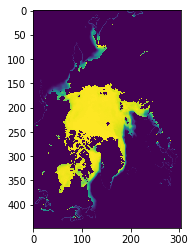

  8%|▊         | 1/12 [06:49<1:15:02, 409.34s/it]

(136192,)


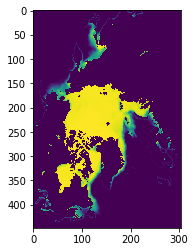

 17%|█▋        | 2/12 [13:32<1:07:53, 407.35s/it]

(136192,)


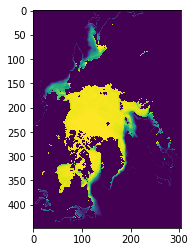

 25%|██▌       | 3/12 [20:14<1:00:53, 405.92s/it]

(136192,)


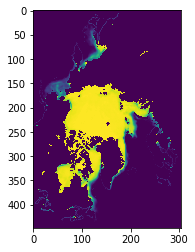

 33%|███▎      | 4/12 [26:58<54:03, 405.41s/it]  

(136192,)


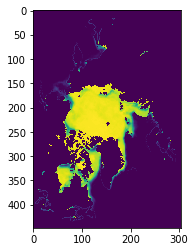

 42%|████▏     | 5/12 [34:00<47:51, 410.28s/it]

(136192,)


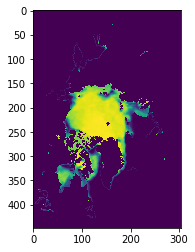

 50%|█████     | 6/12 [41:23<42:00, 420.03s/it]

(136192,)


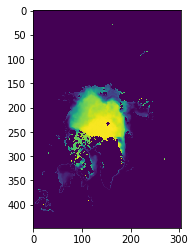

 58%|█████▊    | 7/12 [49:12<36:14, 434.83s/it]

(136192,)


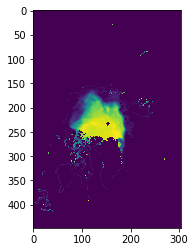

 67%|██████▋   | 8/12 [57:21<30:04, 451.15s/it]

(136192,)


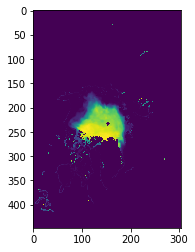

 75%|███████▌  | 9/12 [1:05:36<23:12, 464.16s/it]

(136192,)


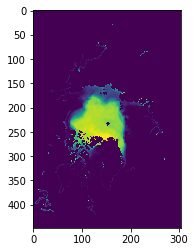

 83%|████████▎ | 10/12 [1:13:18<15:27, 463.59s/it]

(136192,)


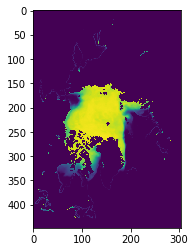

 92%|█████████▏| 11/12 [1:20:36<07:35, 455.88s/it]

(136192,)


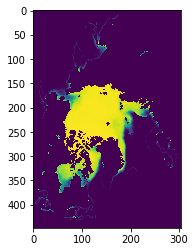

100%|██████████| 12/12 [1:27:37<00:00, 438.09s/it]

(136192,)


In [ ]:
# 기본
from sklearn.neighbors import KNeighborsRegressor

for i in tqdm(range(12)):
  datan = globals()['train{}'.format(i)]

  # 데이터셋 나누기
  x_train = datan[7:19].reshape(12,-1).T  # 600
  y_train = datan[19].reshape(1,-1).T
  x_test = datan[8:20].reshape(12,-1).T

  # 모델 훈련
  model = KNeighborsRegressor(n_neighbors=601, weights='distance', p=1, n_jobs=-1) 
  model.fit(x_train, y_train)

  # 모델 예측
  predictions = model.predict(x_test)
  predictions = predictions.reshape(-1)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(448,304), interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred{}'.format(i)] = predictions
  print(globals()['pred{}'.format(i)].shape)

In [ ]:
# 기본
# 제출 형태로 변환

# 데이터 생성
sh2 = pd.DataFrame(pred0.reshape(1,-1))  # 초기값 설정
sh2 = fun1(sh2)  # 음수와 소숫점 없애기

for i in range(11):
  globals()['pred{}'.format(i+1)] = globals()['pred{}'.format(i+1)].reshape(1,-1)

  sh = globals()['pred{}'.format(i+1)]
  sh = fun1(sh)  # 음수와 소숫점 없애기
  sh = pd.DataFrame(sh)

  sh2 = pd.concat((sh2, sh), axis=0)
  print(sh2.shape)

(2, 136192)
(3, 136192)
(4, 136192)
(5, 136192)
(6, 136192)
(7, 136192)
(8, 136192)
(9, 136192)
(10, 136192)
(11, 136192)
(12, 136192)


In [ ]:
# 1차 데이터 확인 (Pre-제출본)
sh2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 제출

In [ ]:
# sh1의 인덱스 수정

# 12개월, 24개월 투투
result = pd.concat([sh1,sh2], axis=0)
result = result.reset_index(drop=True)

# 제출 파일과 결합
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/sample_submission.csv")
sub = pd.concat([submission.loc[:,'month'],result], axis=1)
sub.columns = submission.columns.values  # 제출파일에서 컬럼명을 
sub.tail()

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
19,2020-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2020-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2020-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2020-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,2020-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Lets Final Check')

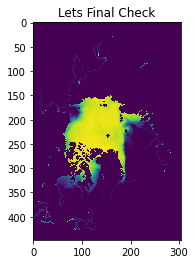

In [ ]:
# 2차 데이터 확인 (최종 제출본)
check = np.array(sub.iloc[10,1:], dtype=np.float64).reshape(448,304)

import matplotlib.pyplot
matplotlib.pyplot.imshow(check, interpolation = 'None')
matplotlib.pyplot.title('Lets Final Check')

In [ ]:
# 제출파일 완성 및 제출
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub_0407_1_KNN.csv', index = False)